Importing Dependencies




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Importing Data

In [2]:
medical_data = pd.read_csv('/content/insurance.csv')
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
medical_data.shape

(1338, 7)

In [4]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorial Features:

1. Sex
2. Smoker
3. Region







In [9]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-18-e2e8f4b62501>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_data['age'])


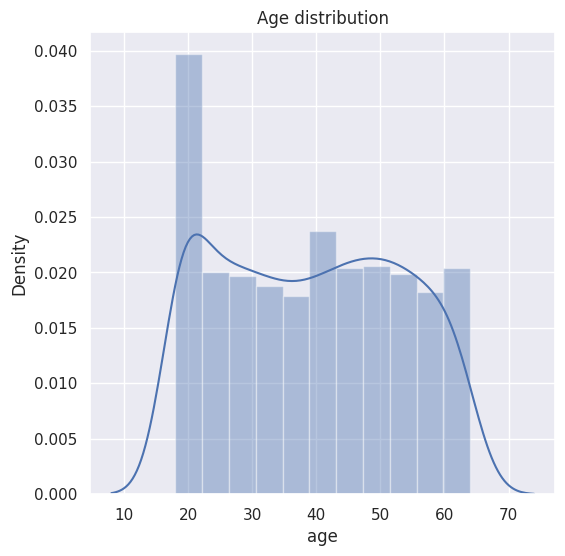

In [18]:
# distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(medical_data['age'])
plt.title('Age distribution')
plt.show()

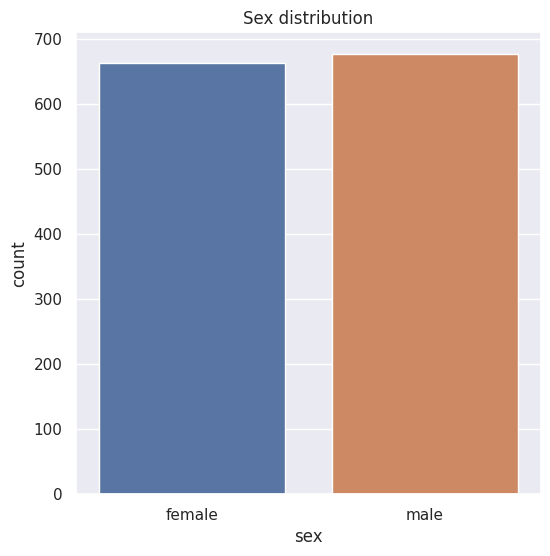

In [22]:
# distribution of sex values
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data = medical_data)
plt.title('Sex distribution')
plt.show()

In [32]:
medical_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-23-48030b5a4fde>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_data['bmi'])


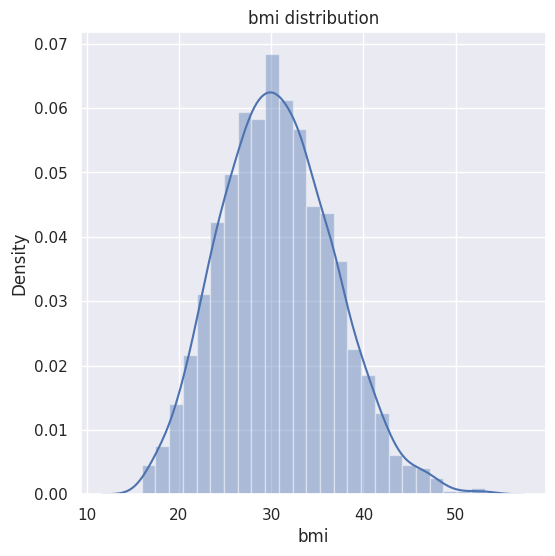

In [23]:
# distribution of bmi values
plt.figure(figsize=(6,6))
sns.distplot(medical_data['bmi'])
plt.title('bmi distribution')
plt.show()

# Normal BMI range --> 18.5 to 24.9

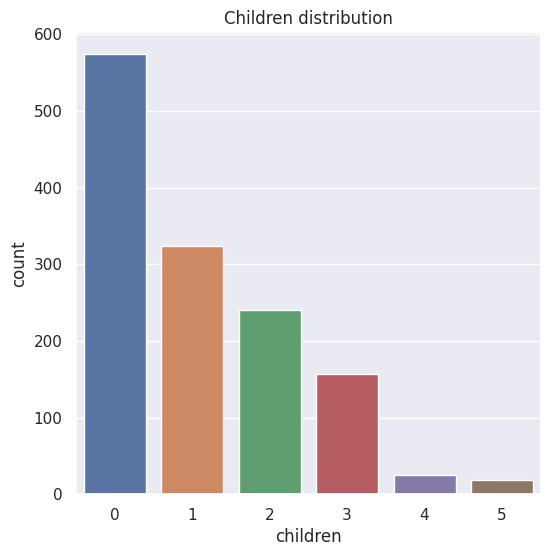

In [26]:
# distribution of children values
plt.figure(figsize=(6,6))
sns.countplot(x = 'children', data = medical_data)
plt.title('Children distribution')
plt.show()

In [27]:
medical_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

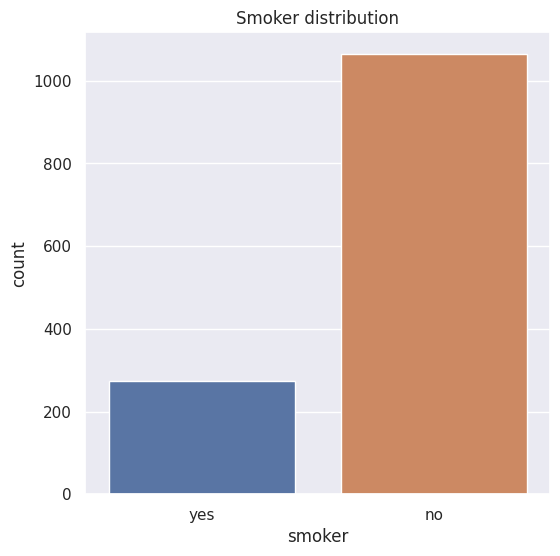

In [28]:
# distribution of smoker values
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker', data = medical_data)
plt.title('Smoker distribution')
plt.show()

In [29]:
medical_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

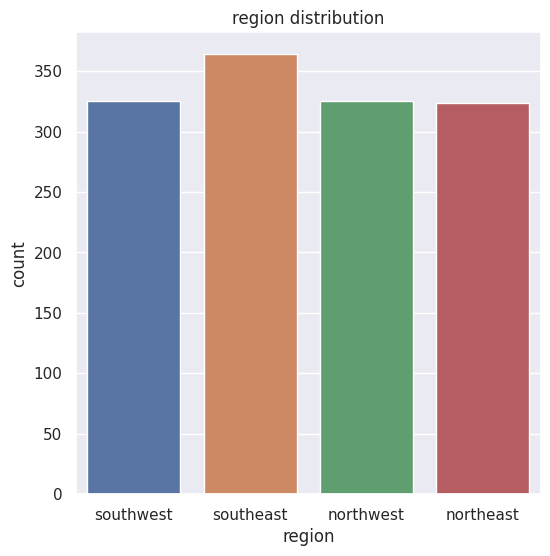

In [30]:
# distribution of region values
plt.figure(figsize=(6,6))
sns.countplot(x='region', data = medical_data)
plt.title('region distribution')
plt.show()

In [31]:
medical_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-33-29b5c0642159>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_data['charges'])


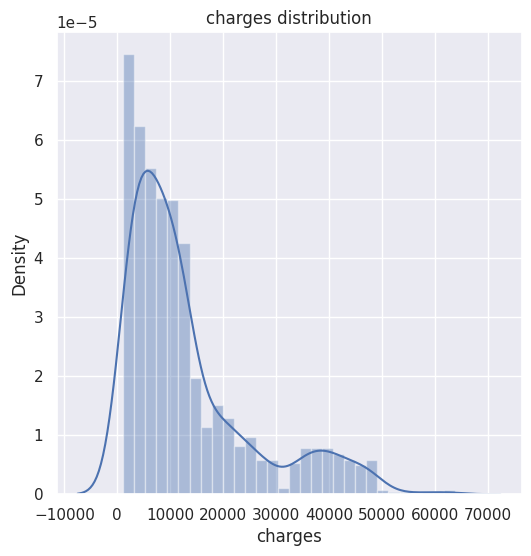

In [33]:
# distribution of charges values
plt.figure(figsize=(6,6))
sns.distplot(medical_data['charges'])
plt.title('charges distribution')
plt.show()

Data Pre-Processing

Encoding the categorical Features

In [34]:
# encoding sex values
medical_data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding region values
medical_data.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}}, inplace=True)

# encoding smoker values
medical_data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

In [35]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


Splitting the features and target

In [36]:
X = medical_data.drop(columns='charges', axis=1)
Y = medical_data['charges']

Splitting training and test set

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [40]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Evaluation

In [42]:
# R2 score of training data
X_train_pred = model.predict(X_train)
train_r2_score = metrics.r2_score(Y_train, X_train_pred)
print('Training Accuracy Score : ',train_r2_score)

# R2 score of test data
X_test_pred = model.predict(X_test)
test_r2_score = metrics.r2_score(Y_test, X_test_pred)
print('Test Accuracy Score : ',test_r2_score)

Training Accuracy Score :  0.7518195459072954
Test Accuracy Score :  0.7454471618659976
